In [1]:
import sys
import time
import pandas as pd
sys.path.append(r'..\src')
df = pd.read_csv(r'..\data\dna.csv')
import forgi.visual.mplotlib as fvm
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from GMfold import gmfold, gm_dot_bracket, gmfold_from_bracket
from seqfold2_0 import fold_2
import math
from typing import List, Tuple
import numpy as np
from Types import Energies, Cache
from dna import DNA_ENERGIES



from seqfold import fold, dot_bracket
import warnings
warnings.filterwarnings('ignore')

# Comparison MGfold, Seqfold, Seqfold 2.0 and mfold/Unafold: Generate Fig. 3 of the paper.
To compute the mfold/unafold ground truth energy associated to the folded structures below, refer to the folding_constraint.txt file. In the file we provide the constraints necessary to compute with UNAfold  the energy associated with the structure obtained with one of the analyzed methods

In [2]:
#Sequence
seq= 'GGGACGACGGGGCACATTGTGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCCGCCTAGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCC'

seq2 = 'GACGACGATTGTGGTCTATTCATAGGCGTCCGCTGAGTCGTC'


# dot brachets strucuture computed by mfold in the unafold softwer. We consider this structure to be the ground truth
open_mfold =   [71, 72 , 0, 1, 2, 3, 4, 5, 6, 7, 33, 34, 35, 11, 12, 13, 14]
closed_mfold = [77, 76, 51, 50, 49, 48, 47, 46, 45, 44, 41, 40, 39, 21, 20, 19, 18]
db_mfold = ['.']*len(seq)


# Set '(' at the open_mfold indices
for i in open_mfold:
    db_mfold[i] = '('

# Set ')' at the closed_mfold indices
for i in closed_mfold:
    db_mfold[i] = ')'

# Convert the list back to a string
db_mfold = ''.join(db_mfold)



{1: (0, 0.0), 2: (0, 0.0), 3: (0, -11.3), 4: (0, -11.3), 5: (0, -10.6), 6: (0, -12.9), 7: (0, -13.5), 8: (0, -13.9), 9: (0, -14.5), 10: (0, -14.8), 11: (0, -15.5), 12: (0, -16.1), 13: (0, -16.1), 14: (0, -16.4), 15: (0, -16.8), 16: (0, -17.1), 17: (0, -17.4), 18: (0, -17.7), 19: (0, -18.1), 20: (0, -18.4), 21: (0, -18.7), 22: (0, -18.7), 23: (0, -19.0), 24: (0, -19.3), 25: (0, -19.7), 26: (0, -19.7), 27: (0, -19.7), 28: (0, -20.0), 29: (0, -20.0), 30: (0, -20.3)}


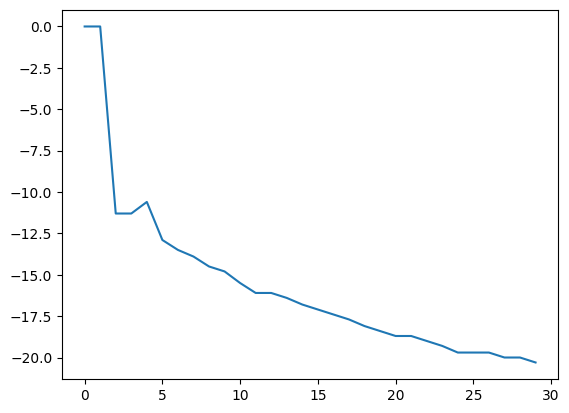

In [3]:
emap = DNA_ENERGIES
j=0
data=[]
print(emap.HAIRPIN_LOOPS)
for i in range(30):
    _,j = emap.HAIRPIN_LOOPS[i+1]
    data.append(j)


plt.plot(range(30),data)
plt.show()

In [4]:
def convert_to_dots(sequence, opens, closed):
    db_a = ['.']*len(sequence)


# Set '(' at the open_mfold indices
    for i in opens:
        db_a[i] = '('

# Set ')' at the closed_mfold indices
    for i in closed:
        db_a[i] = ')'

# Convert the list back to a string
    db_a = ''.join(db_a)
    return(db_a)


mfold/unafold
-3.85
GMfold
-2.7
Seqfold2.0
-2.7
Seqfold
-3.4000000000000004


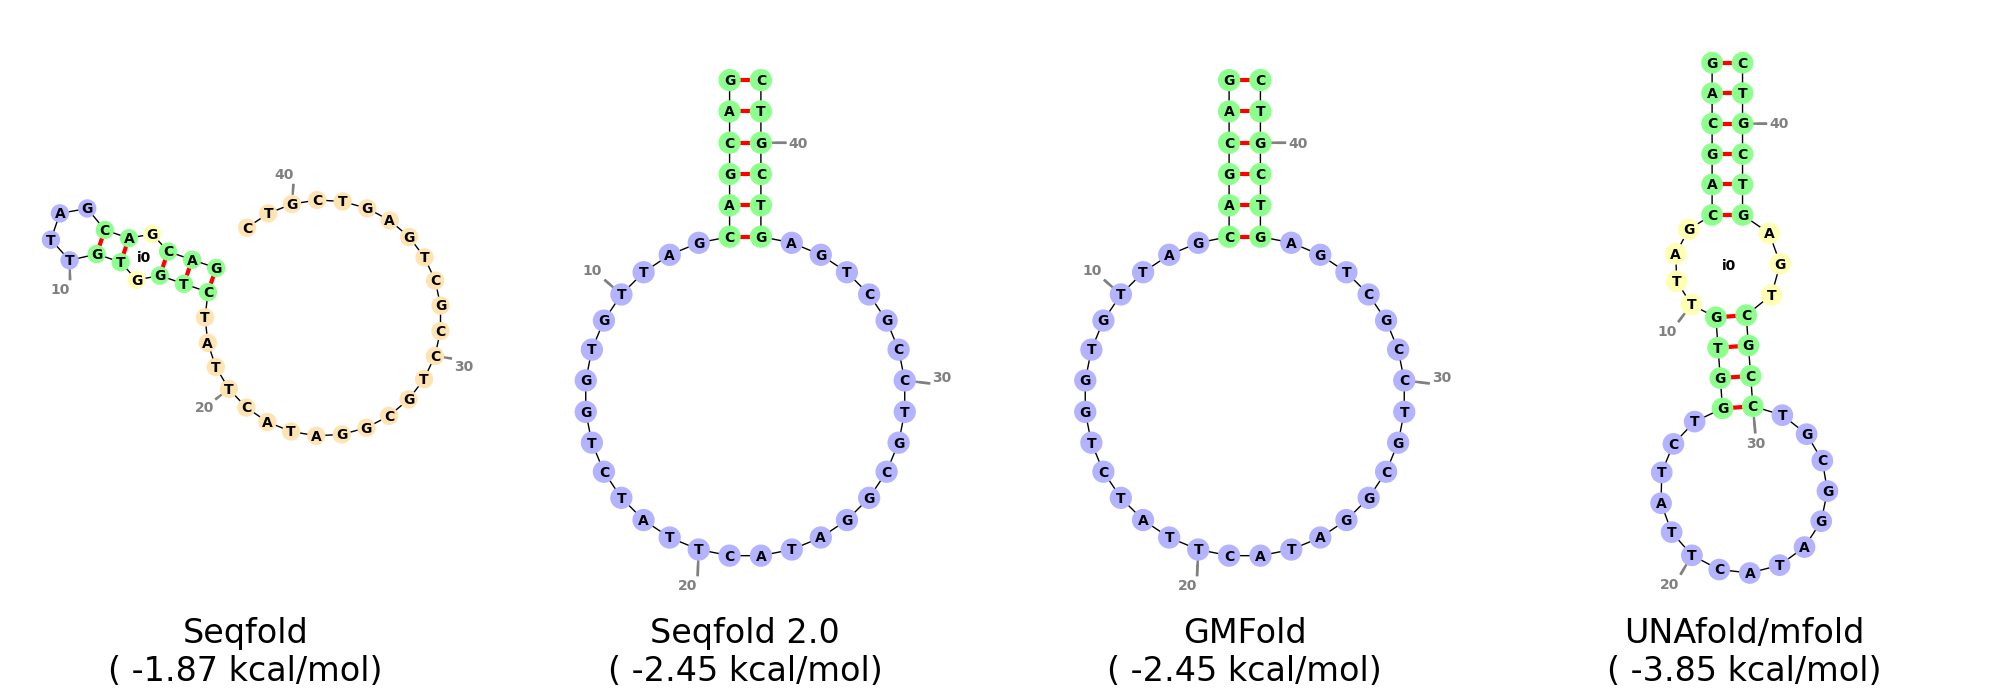

<Figure size 640x480 with 0 Axes>

In [5]:
# Function to plot structures
seq2 = 'GACGACGATTGTGGTCTATTCATAGGCGTCCGCTGAGTCGTC'
open_pairs = [0,1,2,3,4,5,10,11,12,13]
closed_pairs = [29,30,31,32,36,37,38,39,40,41]
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
def plot_structure(seq, axis, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = axis, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})
    #plt.tight_layout()
    #plt.show()
    return

structs = gmfold(seq2) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold

en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e

en3m=-1.87
en2m=-2.45
en1m=-2.45
en0=-3.85
ax1.set_title('Seqfold\n( '+str(round(en3m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\n( '+str(round(en2m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\n( '+str(round(en1m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n( '+str(round(en0,3))+' kcal/mol)',y=-0.1,fontsize=24)

print('mfold/unafold')
print(-3.85)
plot_structure(seq2,ax1, structs2)
plot_structure(seq2,ax2, structs1)
plot_structure(seq2,ax3, structs)
plot_structure(seq2, ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)



print('Seqfold2.0')
print(en2)

print('Seqfold')
print(en3)

plt.tight_layout()
plt.show()
    

plt.savefig('Seq1.pdf')


In [6]:
# Function to plot structures
seq2 = 'ACAGCTGGGTGAAGTAACTTCCTAAAAGGAACAGAGGG'
open_pairs = [4,5,6,18,19,20,21,22]
closed_pairs = [26,27,28,29,30,31,32,33]

def plot_structure(seq, ax, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})

    return


structs = gmfold(seq2) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold
en0=-2.09
en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e

mfold/unafold
-2.09
GMfold
-1.3999999999999995
Seqfold2.0
-1.3999999999999995
Seqfold
-1.3999999999999995


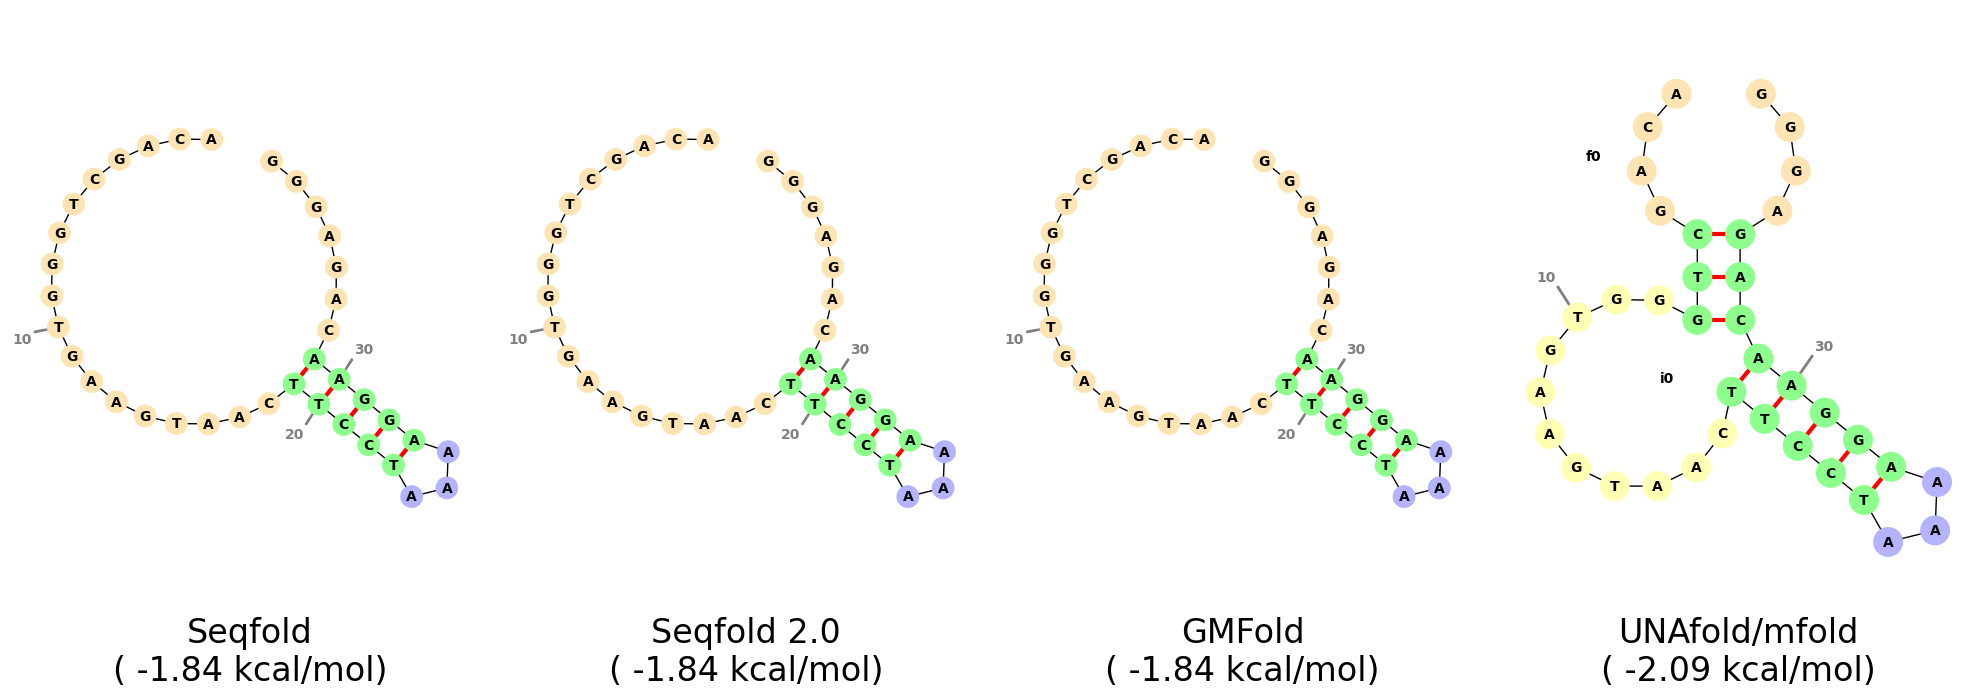

<Figure size 640x480 with 0 Axes>

In [7]:

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))

en3m=-1.84
en2m=-1.84
en1m=-1.84

ax1.set_title('Seqfold\n( '+str(round(en3m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\n( '+str(round(en2m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\n( '+str(round(en1m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n( '+str(round(en0,3))+' kcal/mol)',y=-0.1,fontsize=24)
print('mfold/unafold')
print(-2.09)
plot_structure(seq2,ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)
plot_structure(seq2,ax3, structs)


print('Seqfold2.0')
print(en2)
plot_structure(seq2,ax2, structs1)
print('Seqfold')
print(en3)
plot_structure(seq2,ax1, structs2)



plt.tight_layout()
plt.show()
plt.savefig('Seq2.pdf')

mfold/unafold
-4.88
GMfold
-3.2
Seqfold2.0
-2.0999999999999996
Seqfold
-2.5999999999999996


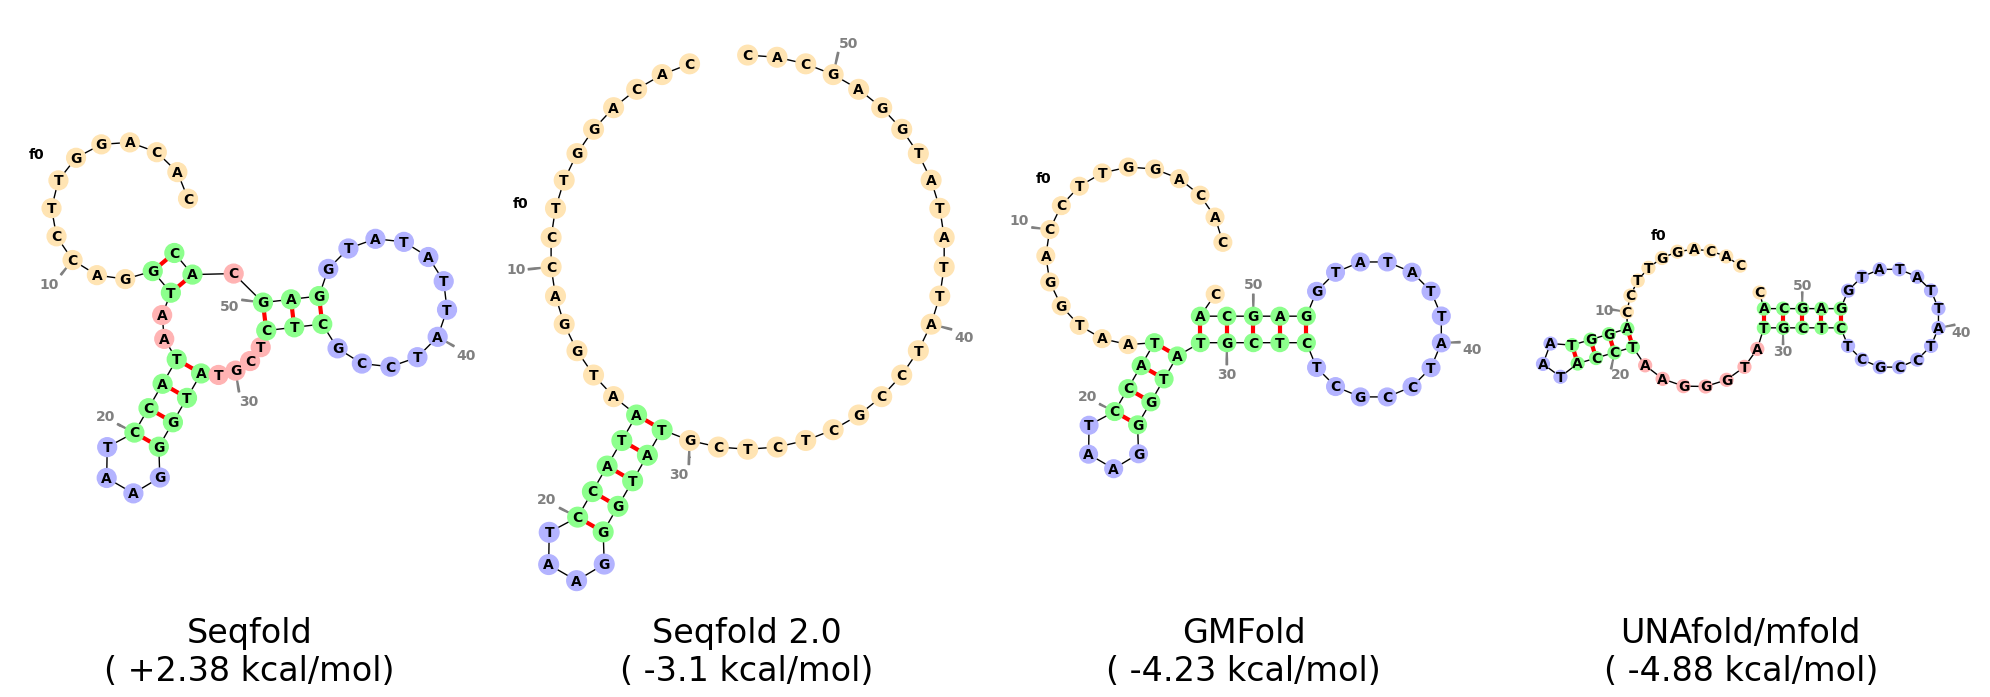

<Figure size 640x480 with 0 Axes>

In [8]:
# Function to plot structures
seq2 = 'CACAGGTTCCAGGTAATACCTAAGGGTATGCTCTCGCCTATTATATGGAGCAC'
open_pairs =  [10,11,12,13,28,29,30,31,32]
closed_pairs = [47,48,49,50,51,17,18,19,20]
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
def plot_structure(seq, ax, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})

    return


structs = gmfold(seq2) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold
en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e


en0=-4.88
en3m=+2.38
en2m=-3.10
en1m=-4.23
ax1.set_title('Seqfold\n( +'+str(round(en3m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\n( '+str(round(en2m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\n( '+str(round(en1m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n( '+str(round(en0,3))+' kcal/mol)',y=-0.1,fontsize=24)

print('mfold/unafold')
print(-4.88)
plot_structure(seq2,ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)
plot_structure(seq2,ax3, structs)


print('Seqfold2.0')
print(en2)
plot_structure(seq2,ax2, structs1)
print('Seqfold')
print(en3)
plot_structure(seq2,ax1, structs2)
plt.tight_layout()
plt.show()
plt.savefig('Seq5.pdf')


mfold/unafold
-2.34
GMfold
-0.8000000000000003
Seqfold2.0
-0.8000000000000003
Seqfold
-0.8000000000000003


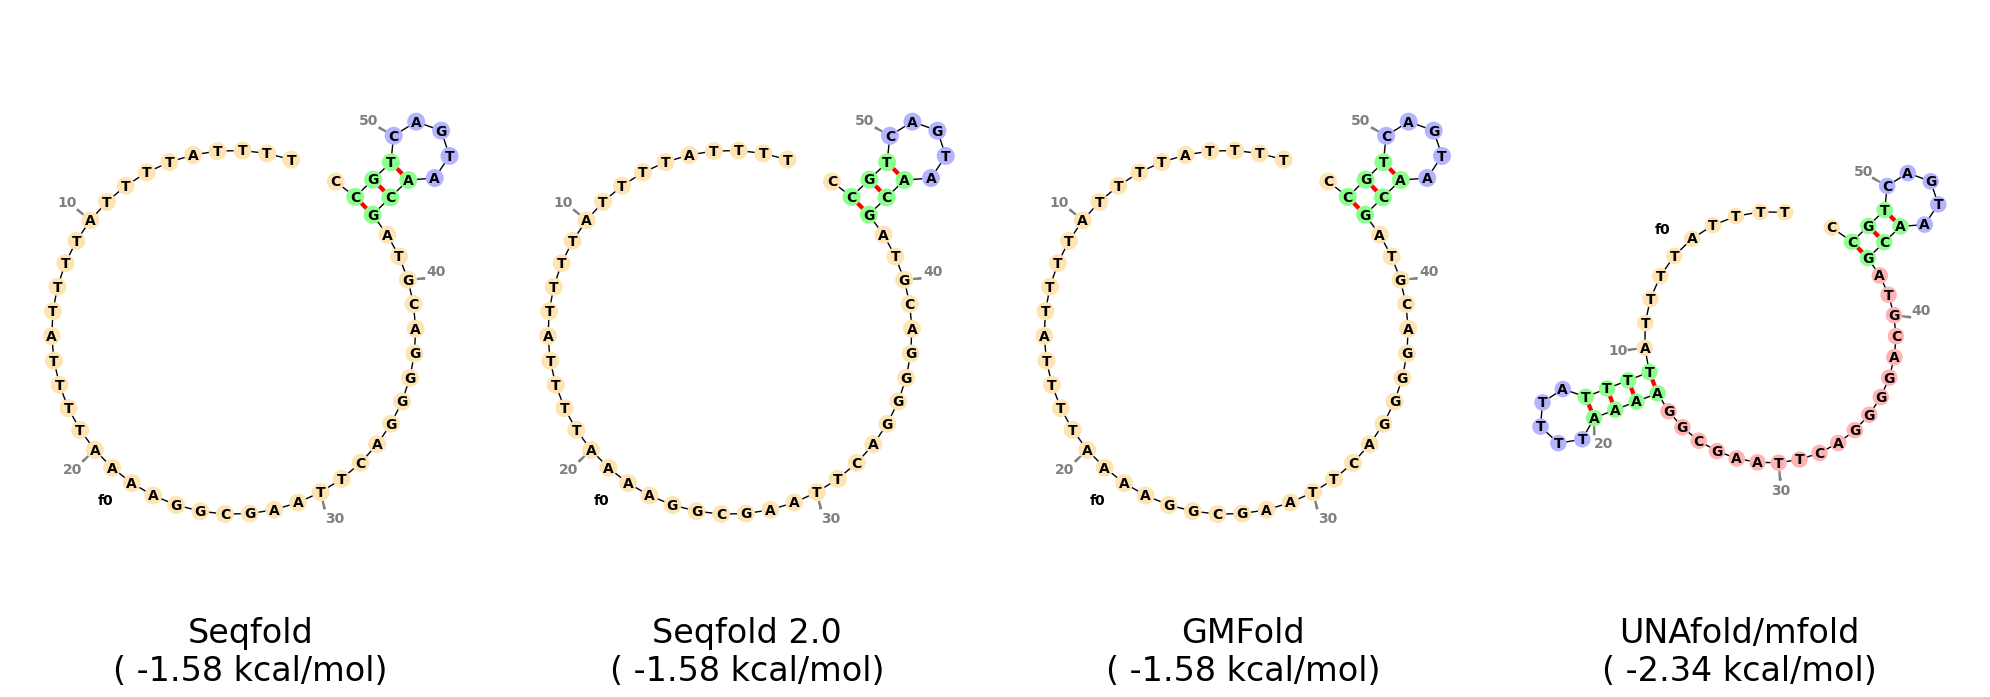

<Figure size 640x480 with 0 Axes>

In [9]:
# Function to plot structures
seq2 = 'TTTTATTTTATTTTATTTTAAAAGGCGAATTCAGGGGACGTAGCAATGACTGCC'
open_pairs =  [10,11,12,13,42,43,44]
closed_pairs = [19,20,21,22,50,51,52]

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
def plot_structure(seq, ax, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})

    return

structs = gmfold(seq2) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold
en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e

en0=-2.34
en3m=-1.58
en2m=-1.58
en1m=-1.58

ax1.set_title('Seqfold\n( '+str(round(en3m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\n( '+str(round(en2m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\n( '+str(round(en1m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n( '+str(round(en0,3))+' kcal/mol)',y=-0.1,fontsize=24)
print('mfold/unafold')
print(-2.34)
plot_structure(seq2,ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)
plot_structure(seq2,ax3, structs)


print('Seqfold2.0')
print(en2)
plot_structure(seq2,ax2, structs1)
print('Seqfold')
print(en3)
plot_structure(seq2,ax1, structs2)

plt.tight_layout()
plt.show()
plt.savefig('Seq3.pdf')

mfold/unafold
-7.42
GMfold
-5.7
Seqfold2.0
-4.599999999999998
Seqfold
-7.1000000000000005


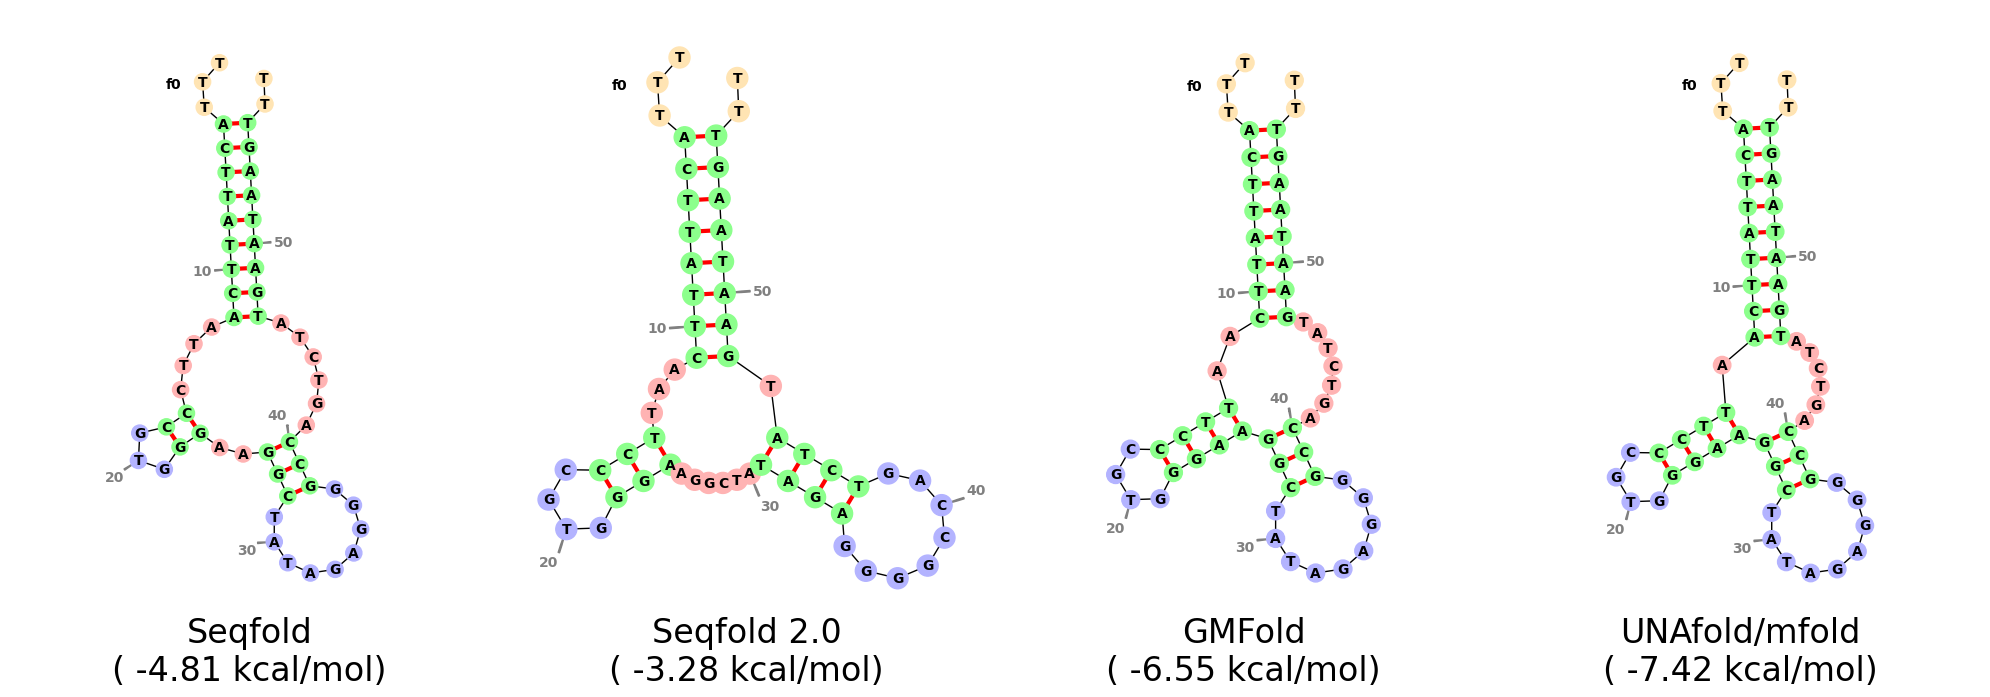

<Figure size 640x480 with 0 Axes>

In [10]:
# Function to plot structures
seq2 = 'TTTACTTATTCAATTCCCGTGGGAAGGCTATAGAGGGGCCAGTCTATGAATAAGTTT'
open_pairs =  [3,4,5,6,7,8,9,10,11,13,14,15,16,25,26,27]
closed_pairs = [46,47,48,49,50,51,52,53,54,21,22,23,24,37,38,39]
def plot_structure(seq, ax, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})

    return



fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
structs = gmfold(seq2,n_branches=5) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold
en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e


en0=-7.42
en3m=-4.81
en2m=-3.28
en1m=-6.55

ax1.set_title('Seqfold\n( '+str(round(en3m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\n( '+str(round(en2m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\n( '+str(round(en1m,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n( '+str(round(en0,3))+' kcal/mol)',y=-0.1,fontsize=24)


print('mfold/unafold')
print(-7.42)
plot_structure(seq2,ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)
plot_structure(seq2, ax3,structs)


print('Seqfold2.0')
print(en2)
plot_structure(seq2,ax2, structs1)
print('Seqfold')
print(en3)
plot_structure(seq2,ax1, structs2)
plt.tight_layout()
plt.show()
plt.savefig('Seq4.pdf')

(((((...((((...)))).......(((.....)))....)))))
{'(2, 43)': [(3, 42), (4, 41), (26, 36), (10, 16), (11, 15), (27, 35), (8, 18), (28, 34), (9, 17)], '(0, 45)': [(2, 43), (3, 42), (4, 41), (26, 36), (10, 16), (11, 15), (27, 35), (8, 18), (28, 34), (9, 17), (1, 44)], '(1, 44)': [(2, 43), (3, 42), (4, 41), (26, 36), (10, 16), (11, 15), (27, 35), (8, 18), (28, 34), (9, 17)], '(3, 42)': [(4, 41), (26, 36), (10, 16), (11, 15), (27, 35), (8, 18), (28, 34), (9, 17)], '(4, 41)': [(26, 36), (10, 16), (11, 15), (27, 35), (8, 18), (28, 34), (9, 17)], '(26, 36)': [(27, 35), (28, 34)], '(10, 16)': [(11, 15)], '(8, 18)': [(10, 16), (11, 15), (9, 17)], '(9, 17)': [(10, 16), (11, 15)], '(11, 15)': [], '(27, 35)': [(28, 34)], '(28, 34)': []}
{'41': {(2, 43)}, '45': {(0, 45)}, '39': {(3, 42)}, '37': {(4, 41)}, '10': {(8, 18), (26, 36)}, '6': {(28, 34), (10, 16)}, '4': {(11, 15)}, '8': {(9, 17), (27, 35)}, '43': {(1, 44)}}
[(2, 43), (0, 45), (3, 42), (4, 41), (26, 36), (10, 16), (11, 15), (27, 35), (8, 18),

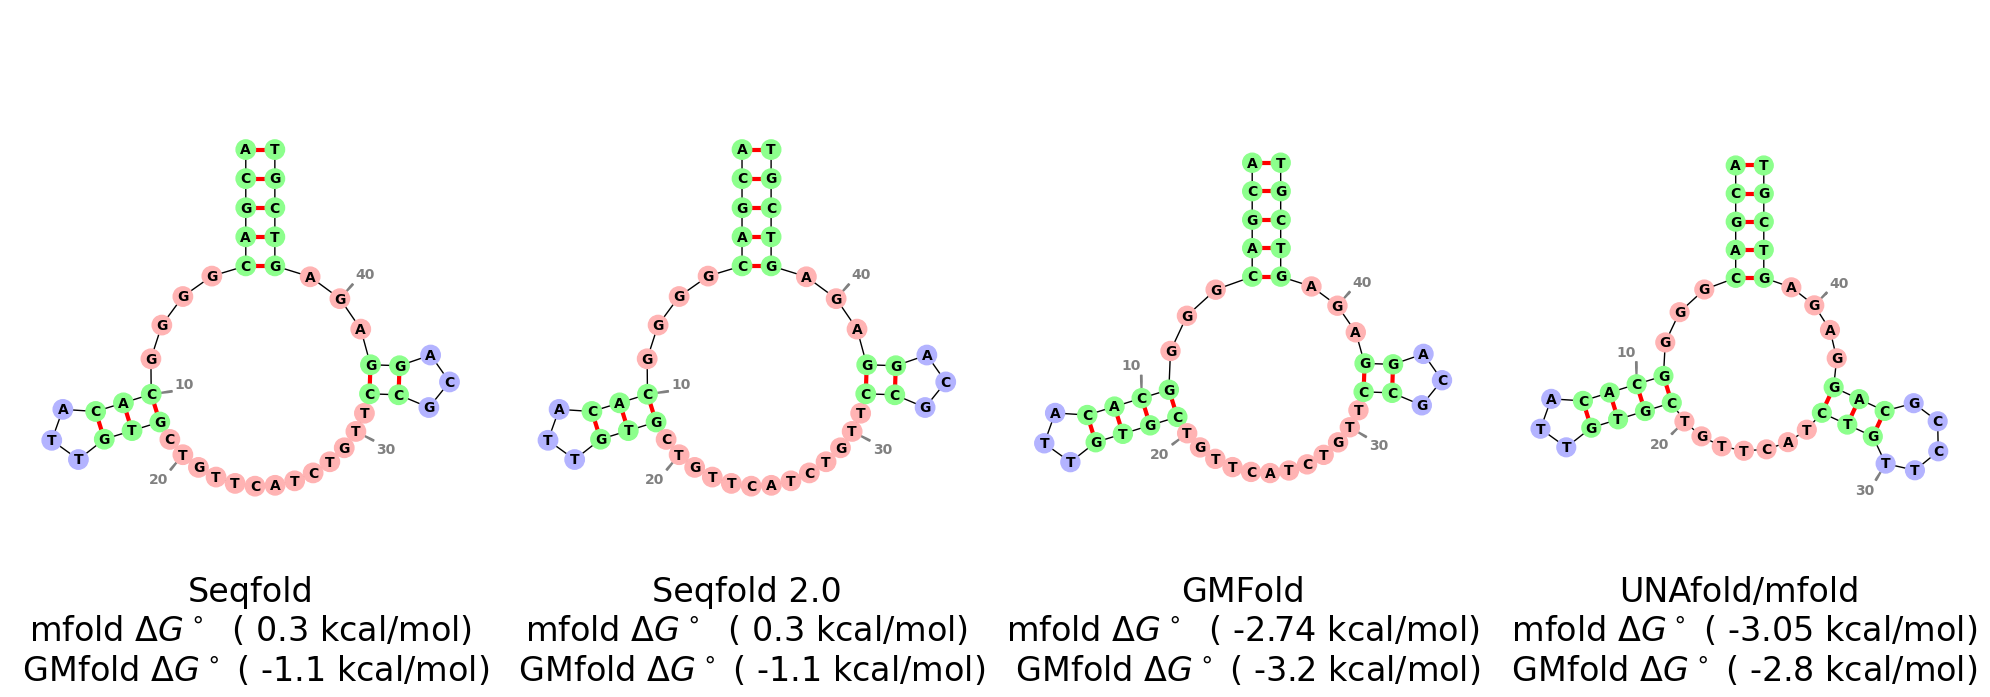

'(((((....(((...)))............((...))...)))))'

<Figure size 640x480 with 0 Axes>

In [24]:
# Function to plot structures
seq2 = 'ACGACGGGGCACATTGTGCTGTTCATCTGTTCCGCAGGAGAGTCGT'
open_pairs =  [0,1,2,3,4,8,9,10,11,26,27,28]
closed_pairs = [45,44,43,42,41,15,16,17,18,34,35,36]
def plot_structure(seq, ax, struct= None, d_b = None):
    if struct != None:
        d_b = gm_dot_bracket( seq, struct)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    
    fvm.plot_rna(bg, ax = ax, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":1}, annotations={'t0':None,'s0':None, 's1':None, 's2':None, 'm0':None, 'm1':None, 'm2':None, 'm3':None, 'h0':None, 'h1':None, 'h2':None})

    return



fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20, 7))
print(convert_to_dots(seq2, open_pairs, closed_pairs))
structs_mfold = gmfold_from_bracket(seq2, n_branches=4, brackets=convert_to_dots(seq2, open_pairs, closed_pairs))
braxseq='(((((....(((...))).............((...))...)))))'
braxseq2='(((((....(((...))).............((...))...)))))'

structs_seqfold = gmfold_from_bracket(seq2, n_branches=4, brackets=braxseq)
structs_seqfold2 = gmfold_from_bracket(seq2, n_branches=4, brackets=braxseq2)
en1_mfold=0

en2_mfold=0
en3_mfold=0
structs = gmfold(seq2,n_branches=5) # Run gmfold
structs1 = fold_2(seq2) # Run Seqfold2.0
structs2 = fold(seq2) #Run Sefold
en1 = 0
for s in structs:
    en1 = en1+s.e

en2 = 0
for s in structs1:
    en2 = en2+s.e

en3 = 0
for s in structs2:
    en3 = en3+s.e

en_mfold = 0
for s in structs_mfold:
    en_mfold = en_mfold+s.e

for s in structs_seqfold:
    en3_mfold = en3_mfold+s.e
for s in structs_seqfold2:
    en2_mfold = en2_mfold+s.e

print("GMfold energy for mfold "+str(en_mfold))
print("GMfold energy for GMfold  "+str(en1))
en0=-3.05
en3m=+0.3
en2m=+0.3
en1m=-2.74

ax1.set_title('Seqfold\nmfold $\Delta G^\circ$  ( '+str(round(en3m,3))+' kcal/mol)\n GMfold $\Delta G^\circ$ ( '+str(round(en3_mfold,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax2.set_title('Seqfold 2.0\nmfold $\Delta G^\circ$  ( '+str(round(en2m,3))+' kcal/mol)\n GMfold $\Delta G^\circ$ ( '+str(round(en2_mfold,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax3.set_title('GMFold\nmfold $\Delta G^\circ$  ( '+str(round(en1m,3))+' kcal/mol)\n GMfold $\Delta G^\circ$ ( '+str(round(en1,3))+' kcal/mol)',y=-0.1,fontsize=24)
ax4.set_title('UNAfold/mfold\n mfold $\Delta G^\circ$ ( '+str(round(en0,3))+' kcal/mol)\n GMfold $\Delta G^\circ$ ( '+str(round(en_mfold,3))+' kcal/mol)',y=-0.1,fontsize=24)


print('mfold/unafold')
print(en0)
plot_structure(seq2,ax4,d_b =  convert_to_dots(seq2,open_pairs,closed_pairs))
print('GMfold')
print(en1)
plot_structure(seq2, ax3,structs)


print('Seqfold2.0')
print(en2)
plot_structure(seq2,ax2, structs1)
print('Seqfold')
print(en3)
plot_structure(seq2,ax1, structs2)
plt.tight_layout()
plt.show()
plt.savefig('Seq5.pdf')
'(((((....(((...)))............((...))...)))))'

# Comparison on sequences provided in the Seqfold github repository


S1
GGGAGGTCGTTACATCTGGGTAACACCGGTACTGATCCGGTGACCTCCC
time gmfold 0.047066688537597656
-15.600000000000003
time Seqfold 2.0 0.23078060150146484
-12.600000000000003
time Seqfold 0.09382390975952148


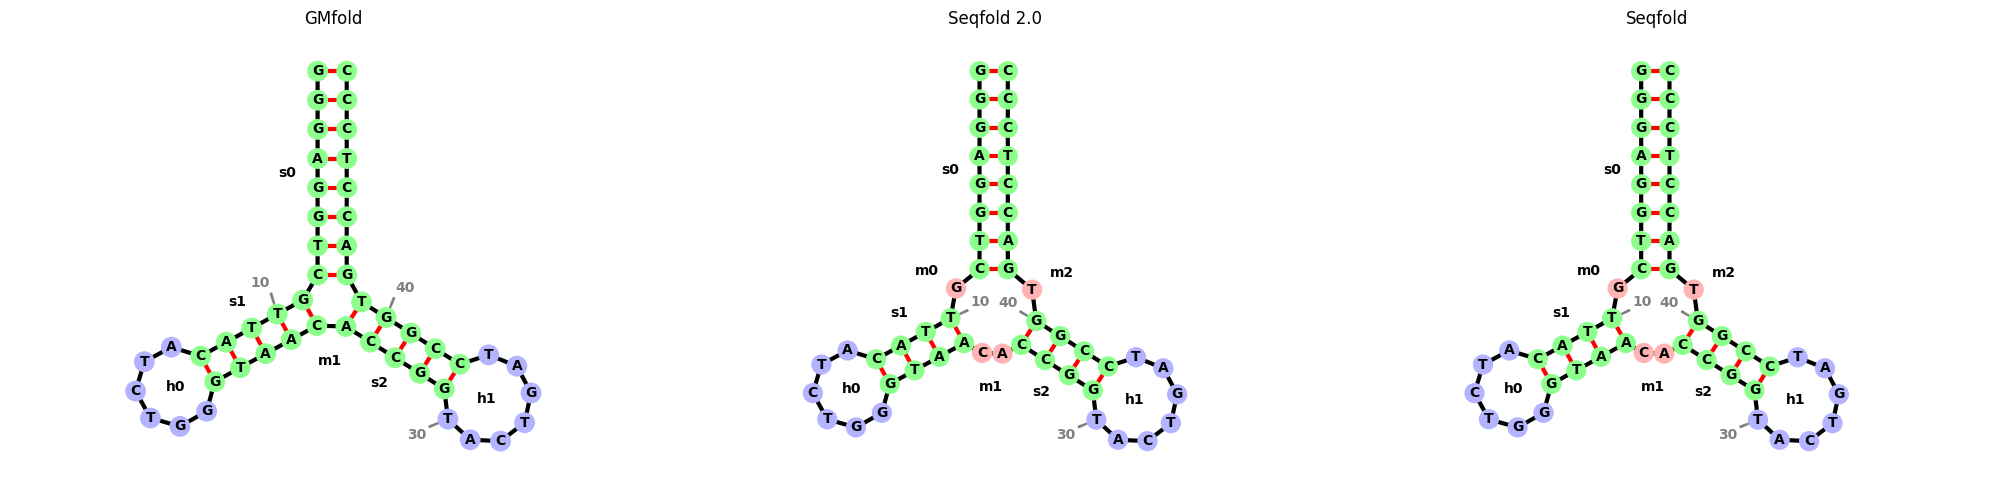

S2
GGGAGGTCGCTCCAGCTGGGAGGAGCGTTGGGGGTATATACCCCCAACACCGGTACTGATCCGGTGACCTCCC
time gmfold 1.7684268951416016
-27.500000000000007
time Seqfold 2.0 0.3257899284362793
-21.400000000000006
time Seqfold 0.44263362884521484


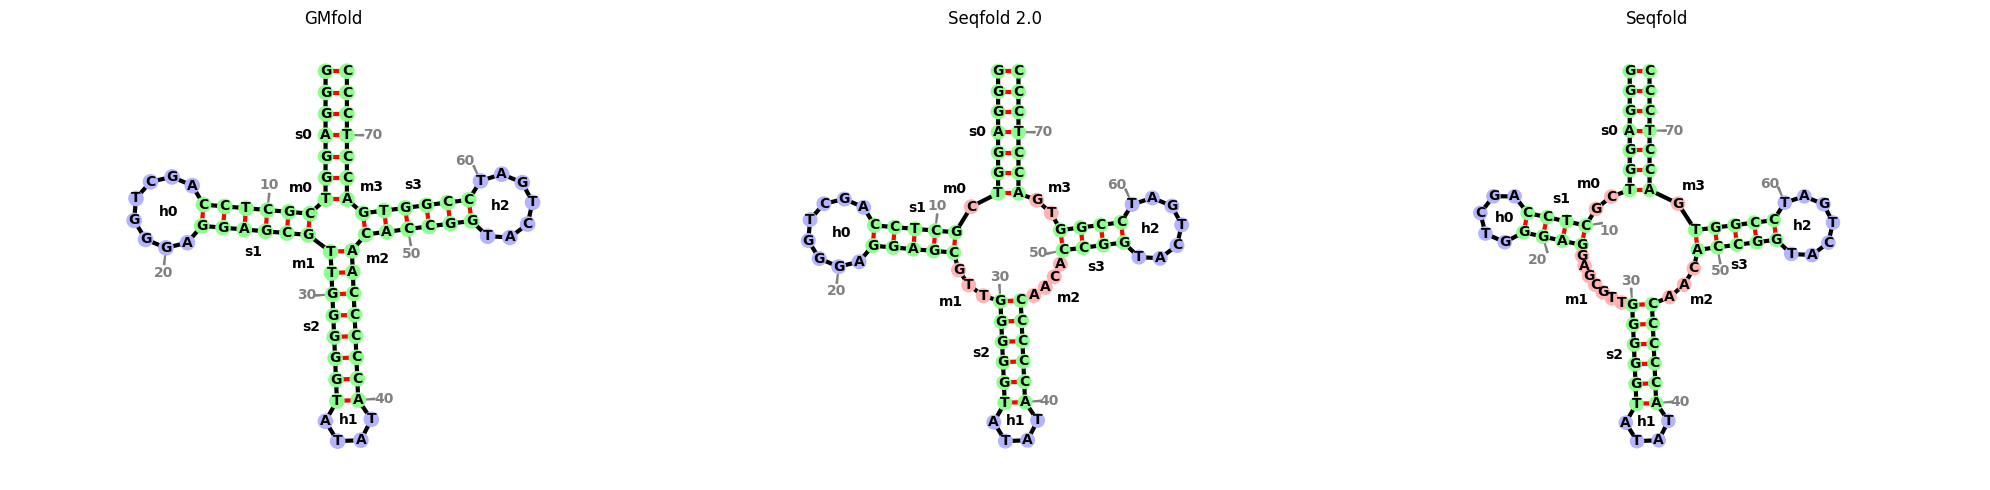

S3
TAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGT
time gmfold 0.018767356872558594
-4.700000000000001
time Seqfold 2.0 0.03980088233947754
-3.1999999999999997
time Seqfold 0.23589181900024414


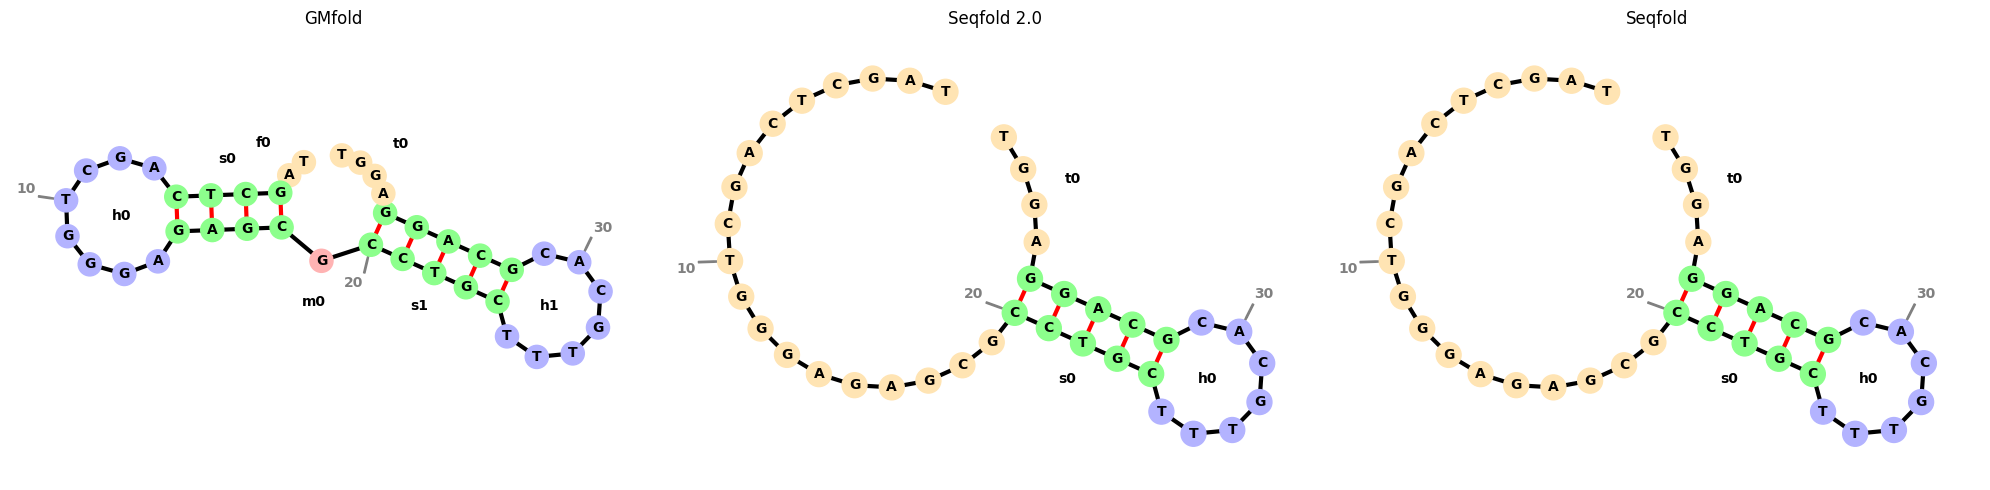

S4
GGGGGCATAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGTCTGCGGTTCGATCCCGCGCGCTCCCACCA
time gmfold 2.8992843627929688
-14.899999999999999
time Seqfold 2.0 0.3838498592376709
-14.899999999999999
time Seqfold 0.5268709659576416


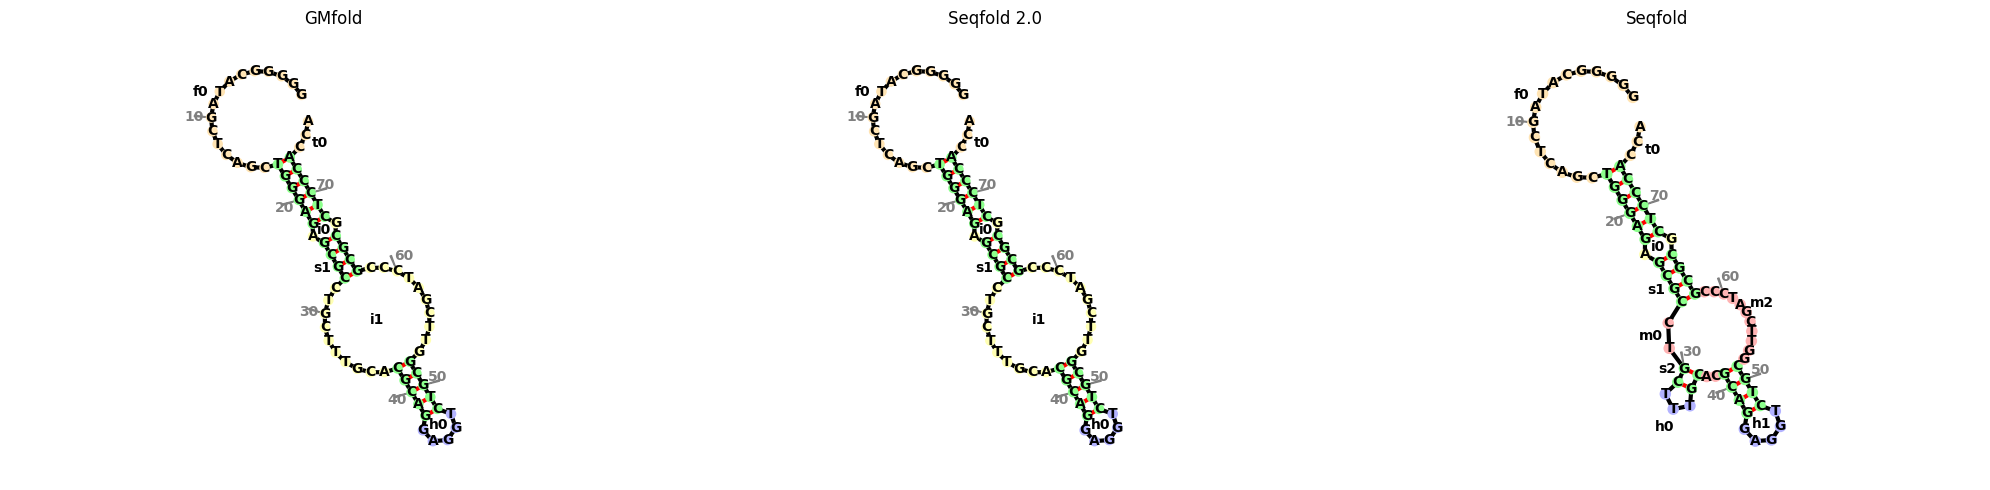

TGAGACGGAAGGGGATGATTGTCCCCTTCCGTCTCA
time gmfold 0.018660545349121094
-17.800000000000004
time Seqfold 2.0 0.02125859260559082
-17.800000000000004
time Seqfold 0.024083852767944336


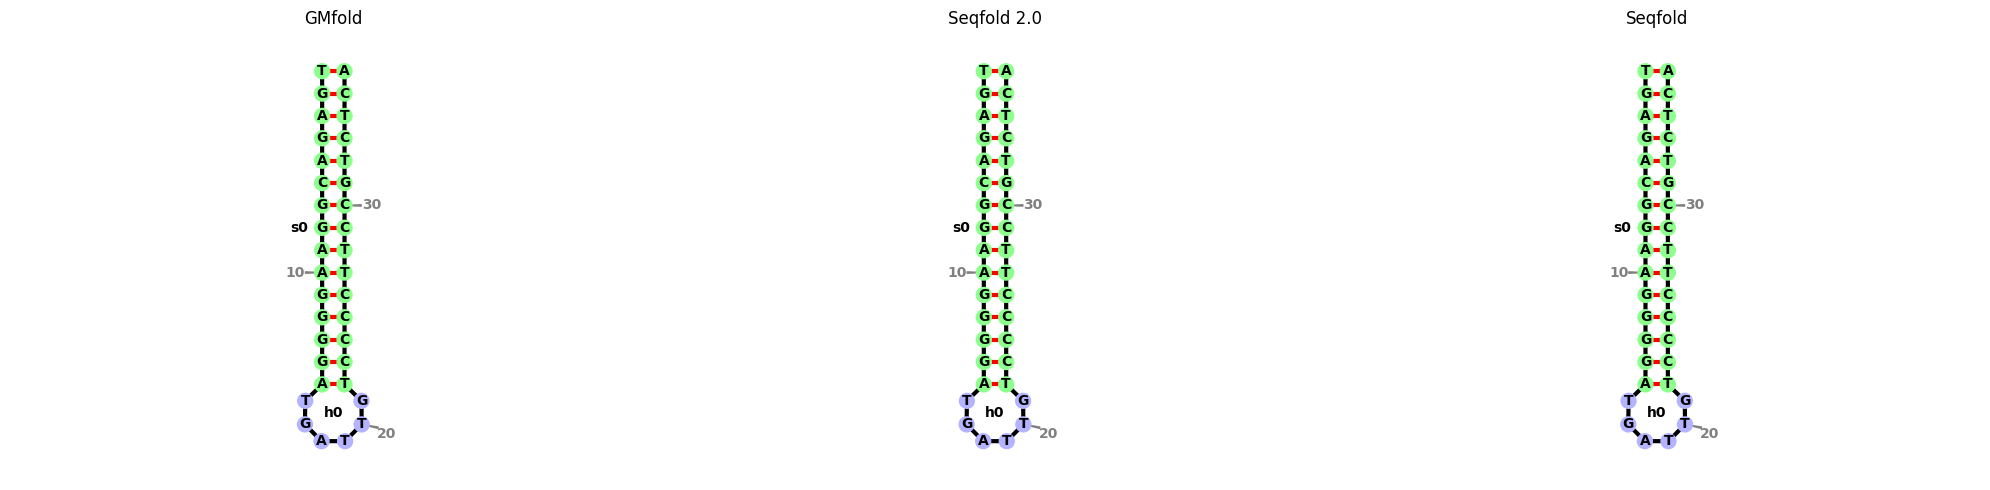

ACCCCCTCCTTCCTTGGATCAAGGGGCTCAA
time gmfold 0.010193347930908203
-2.1000000000000005
time Seqfold 2.0 0.015654563903808594
-2.1000000000000005
time Seqfold 0.012197256088256836


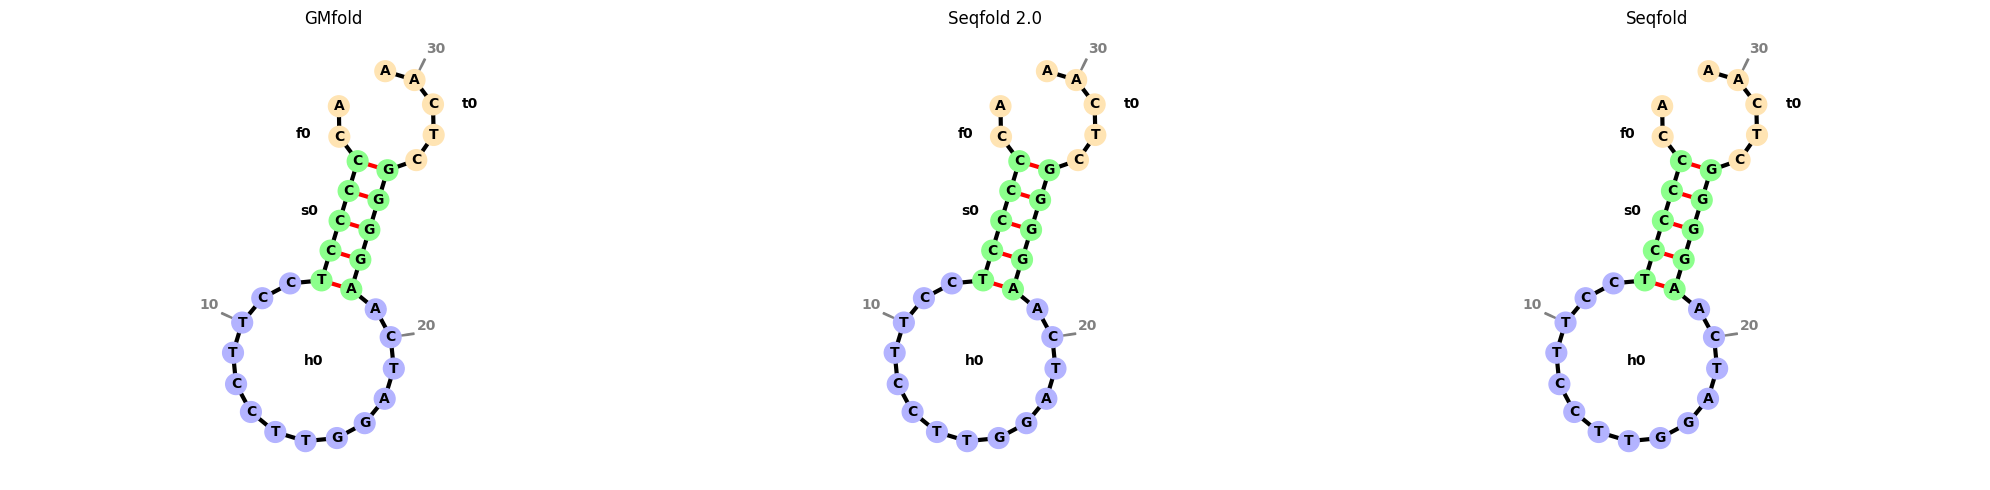

S5
TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC
time gmfold 0.7881097793579102
-6.100000000000001
time Seqfold 2.0 0.9268167018890381
-5.100000000000001
time Seqfold 1.3222718238830566


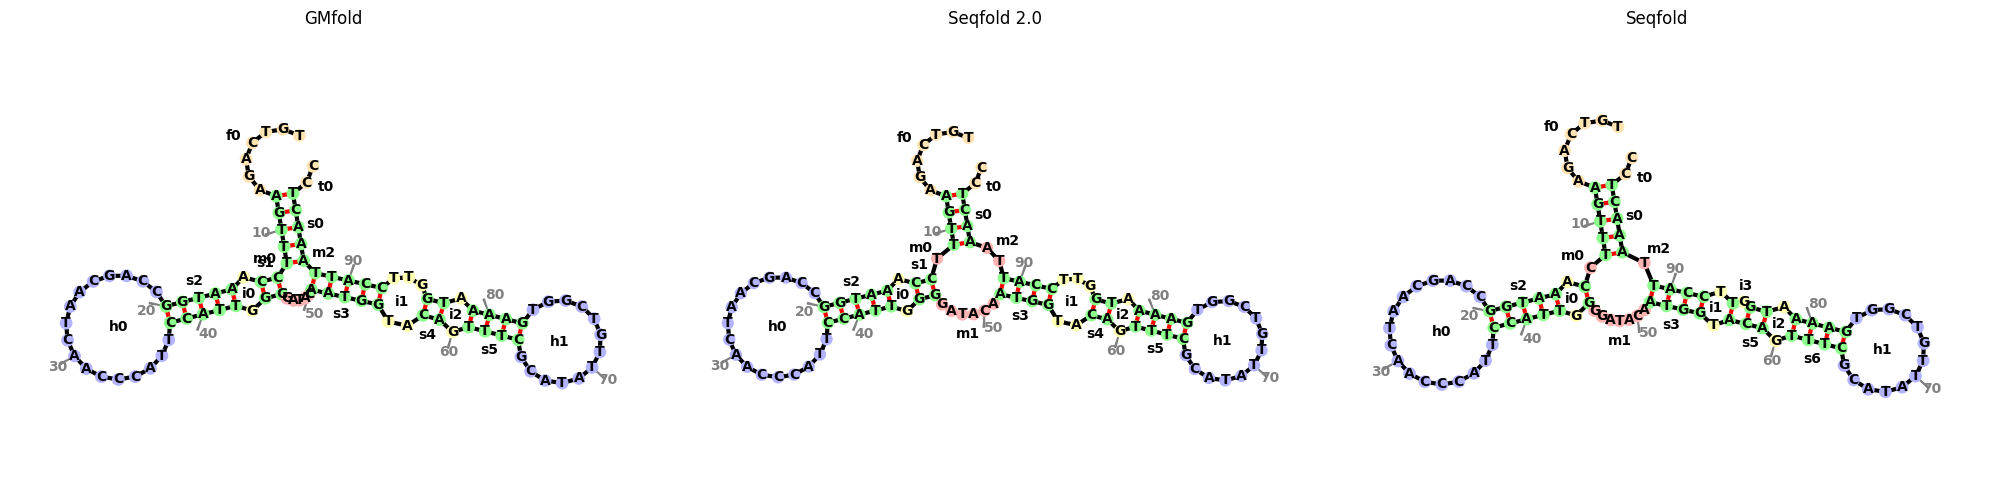

In [12]:
# Compare  gmfold, Seqfold 2.0 and Seqfold on sequences provided in Seqfold github repository. 
df = pd.read_csv(r'..\data\dna.csv') 


sequences_in_table = {0: 'S1', 1: 'S2', 3: 'S3', 4: 'S4', 7: 'S5'}

for count, seq in enumerate(df['seq']):
   
    if 'U' not in seq:
        if count in sequences_in_table:
            print(sequences_in_table[count])
        print(seq)
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
        start_time = time.time()
        structs = gmfold(seq, l_fix = 0, n_branches=4)
        
        print('time gmfold',time.time() - start_time  )
        d_b = gm_dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax1, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax1.set_title('GMfold')
        en3 = 0
        for s in structs:
            en3 = en3+s.e
        print(en3)
        
        start_time = time.time()
        structs = fold_2(seq)
        print('time Seqfold 2.0',time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax2, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax2.set_title('Seqfold 2.0')
        en3 = 0
        for s in structs:
            en3 = en3+s.e
        print(en3)
        
        start_time = time.time()
        structs = fold(seq)
        print('time Seqfold', time.time() - start_time  )
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,  ax= ax3, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
        ax3.set_title('Seqfold')
        
        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()
    


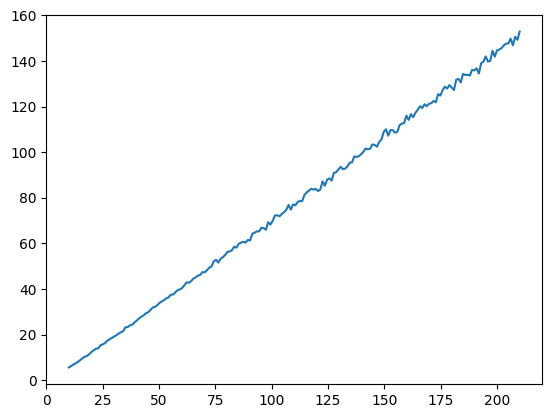

In [13]:
r=10000
max_cum_sum_list=0
#decksize= 2*50
off=10
sizes =[]
for decksize in range(200):
    card_list= 2*(np.arange((decksize+off)*2)<(decksize+off))-1
    max_cum_sum_list=0
    for i in range(r):
        np.random.shuffle(card_list)
        c=np.cumsum(card_list)
        max_cum_sum_list=max_cum_sum_list+np.max(c)
    sizes.append(max_cum_sum_list/r)

plt.plot(np.linspace(10,210,200),np.square(sizes))
plt.show()






1.283708675084699 1.2560386626562776 -0.024921312406671437


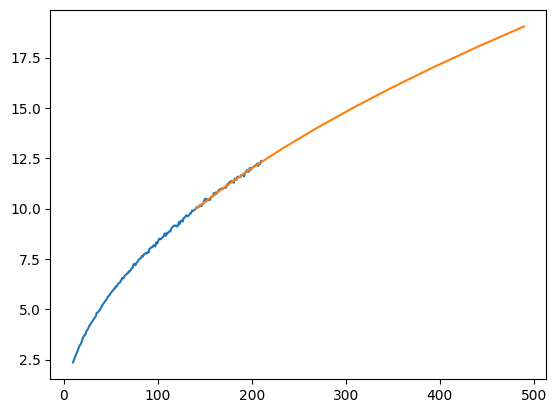

In [14]:
plt.plot(np.linspace(10,210,200),(sizes))
a,b,c=np.polyfit(sizes,np.linspace(10,210,200),2)
print(a,b,c)
x=np.linspace(10,210,200)
y=a*np.square(x)+b*x+c
plt.plot(y[:10],x[:10])
#plt.plot(np.linspace(10,210,200),(sizes)


plt.show()

In [15]:
s= '((((((......))))))..(())'
final_struct=[]
holder=[]
height = 0
index=0
for i in s:
    
    if i == '(':
        holder.append(index)
        height= height+1
    if i == ')':
        height= height-1
        i=holder[height]
        j=index
        final_struct.append([i,j])
        holder.pop()

    index +=1    

B_g = np.zeros((len(s), len(s)), dtype=int)
for p in final_struct:
    B_g[p[0], p[1]] = 1
    B_g[p[1], p[0]] = 1


print(len(s))
print(B_g)

24
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 